In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# I want to load a csv placed in ../logs/log_ear_mar.csv
# with this header timestamp;path_img;ear;mar

# And load into a dataframe using pandas

file_path = "../logs/log_ear_mar.csv"

df = pd.read_csv(file_path, sep=";")

In [3]:
df['category'] = df['path_img'].apply(lambda x: x.split('/')[2])
df

# cast ear and mar to float
df['ear'] = df['ear'].astype(float)
df['mar'] = df['mar'].astype(float)

In [4]:
df

,timestamp,path_img,ear,mar,category
0,20230911220029563455,./frames/bostezo/frame_20230911220029563455.jpg,0.140504,0.682872,bostezo
1,20230911220029682586,./frames/bostezo/frame_20230911220029682586.jpg,0.147645,0.800760,bostezo
2,20230911220029743451,./frames/bostezo/frame_20230911220029743451.jpg,0.189989,0.849610,bostezo
3,20230911220029822007,./frames/bostezo/frame_20230911220029822007.jpg,0.132697,0.818756,bostezo
4,20230911220029908184,./frames/bostezo/frame_20230911220029908184.jpg,0.159582,0.852484,bostezo
...,...,...,...,...,...
2288,20230913204142763855,./frames/boca_abierta_ojos_abiertos/frame_2023...,0.210518,0.641856,boca_abierta_ojos_abiertos
2289,20230913204142836976,./frames/boca_abierta_ojos_abiertos/frame_2023...,0.219036,0.618897,boca_abierta_ojos_abiertos
2290,20230913204142935674,./frames/boca_abierta_ojos_abiertos/frame_2023...,0.209302,0.665549,boca_abierta_ojos_abiertos
2291,20230913204143051935,./frames/boca_abierta_ojos_abiertos/frame_2023...,0.225868,0.618897,boca_abierta_ojos_abiertos


In [5]:
# mostrar las distintas categorias
df['category'].unique()

array(['bostezo', 'ojos_cerrados', 'ojos_abiertos', 'boca_cerrada',
       'hablando', 'bostezando', 'boca_abierta_ojos_cerrados',
       'boca_cerrada_ojos_cerrados', 'boca_cerrada_ojos_abiertos',
       'boca_abierta_ojos_abiertos'], dtype=object)

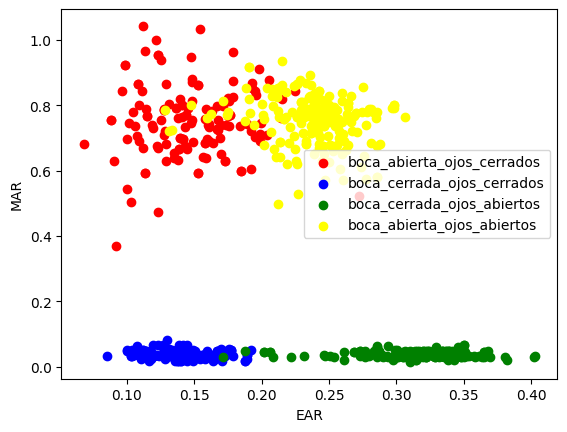

In [6]:
# plot ear vs mar, coloring different categories
colors = {
    'boca_abierta_ojos_cerrados': 'red',
    'boca_cerrada_ojos_cerrados': 'blue',
    'boca_cerrada_ojos_abiertos': 'green',
    'boca_abierta_ojos_abiertos': 'yellow'
}

# Plot a scatter plot with labels per category
for category in colors.keys():
    plt.scatter(df[df['category'] == category]['ear'], df[df['category'] == category]['mar'], c=colors[category], label=category)

plt.xlabel('EAR')
plt.ylabel('MAR')
plt.legend()
plt.show()


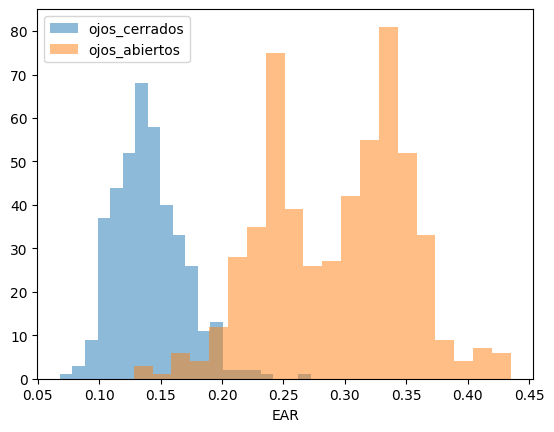

In [9]:
# Create a distribution plot for categories that contains 'ojos_cerrados' vs 'ojos_abiertos' and EAR
plt.hist(df[df['category'].str.contains('ojos_cerrados')]['ear'], bins=20, alpha=0.5, label='ojos_cerrados')
plt.hist(df[df['category'].str.contains('ojos_abiertos')]['ear'], bins=20, alpha=0.5, label='ojos_abiertos')
plt.xlabel('EAR')
plt.legend()
plt.show()

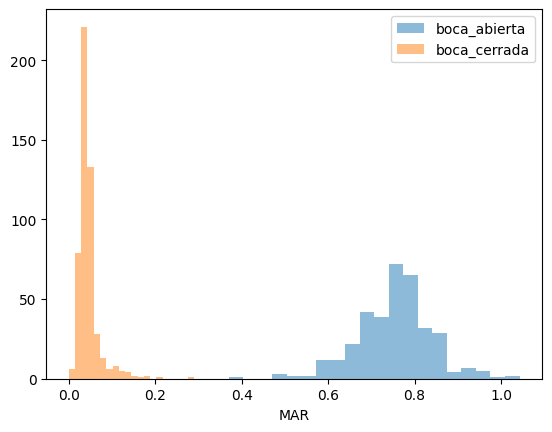

In [10]:
# Create a distribution plot for categories that contains 'boca_abierta' vs 'boca_cerrada' and MAR
plt.hist(df[df['category'].str.contains('boca_abierta')]['mar'], bins=20, alpha=0.5, label='boca_abierta')
plt.hist(df[df['category'].str.contains('boca_cerrada')]['mar'], bins=20, alpha=0.5, label='boca_cerrada')
plt.xlabel('MAR')
plt.legend()
plt.show()

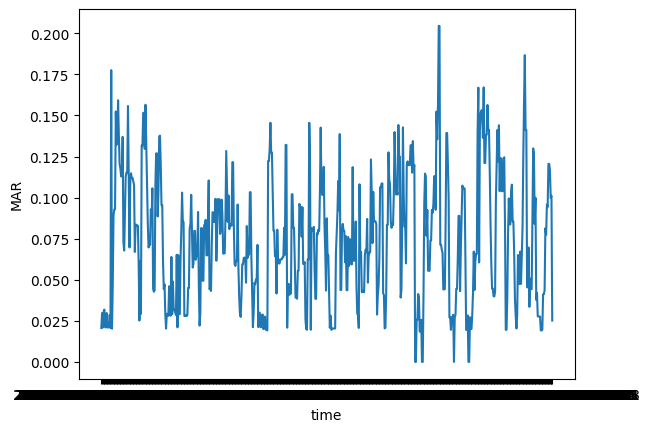

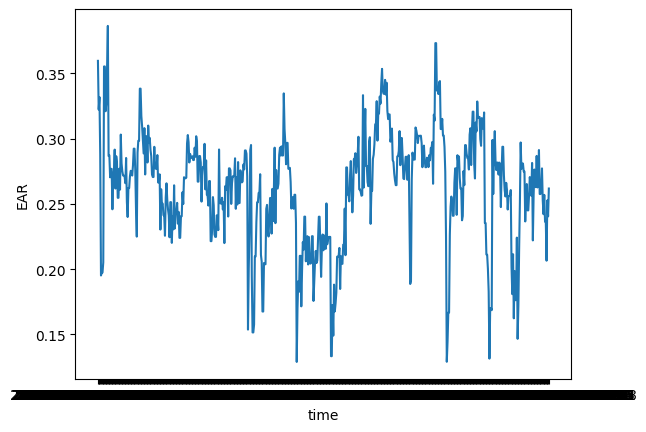

In [11]:
# Plot MAR and EAR vs time for "hablando" category
plt.plot(df[df['category'] == 'hablando']['timestamp'], df[df['category'] == 'hablando']['mar'])
plt.xlabel('time')
plt.ylabel('MAR')
plt.show()

plt.plot(df[df['category'] == 'hablando']['timestamp'], df[df['category'] == 'hablando']['ear'])
plt.xlabel('time')
plt.ylabel('EAR')
plt.show()


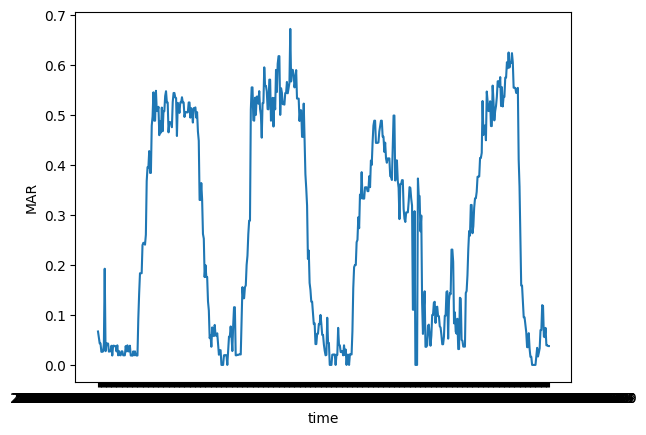

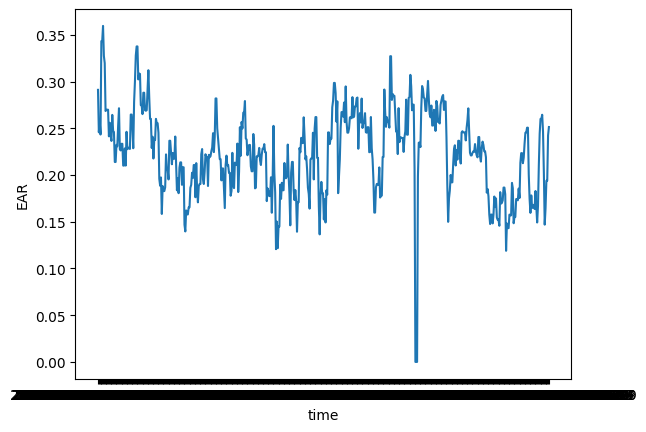

In [12]:
# Plot MAR and EAR vs time for "bostezando" category
plt.plot(df[df['category'] == 'bostezando']['timestamp'], df[df['category'] == 'bostezando']['mar'])
plt.xlabel('time')
plt.ylabel('MAR')
plt.show()

plt.plot(df[df['category'] == 'bostezando']['timestamp'], df[df['category'] == 'bostezando']['ear'])
plt.xlabel('time')
plt.ylabel('EAR')
plt.show()